In [2]:
import sys
sys.path.append('../utils/')
from pitch_detectors import *
from signal_manager import *
sys.path.append('../')

### First we create a signal, and we visualize it

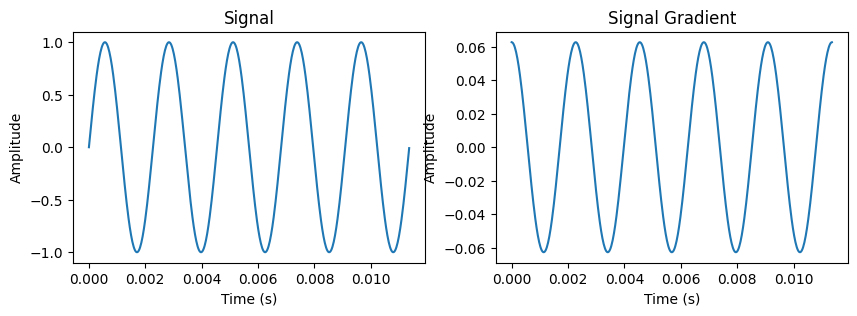

In [3]:
fs = 44100
f0 = 440
period = 1/f0
nb_of_periods = 5

signal = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
visualize_signal(signal, fs)

## Time-Event Methods
### On mono-harmonic signal

In [4]:
zrc, zrc_arr = zero_crossing_rate(signal)
pr, pr_arr = peak_rate(signal)
zrc_slope, zrc_slope_arr = slope_event_rate(signal, mode="zcr")
pr_slope, pr_slope_arr = slope_event_rate(signal, mode="pr")

print("Zero Crossing Rate Estimator: ", zrc_to_hz(zrc, fs, len(signal)), "Hz")
print("Peak Rate Estimator: ", pr_to_hz(pr, fs, len(signal)), "Hz")

Zero Crossing Rate Estimator:  439.2430278884462 Hz
Peak Rate Estimator:  439.2430278884462 Hz


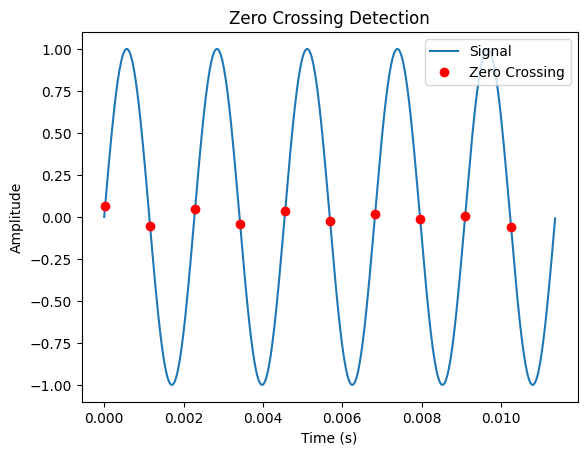

In [5]:
visualize_signal(signal, fs, zrc_arr=zrc_arr)

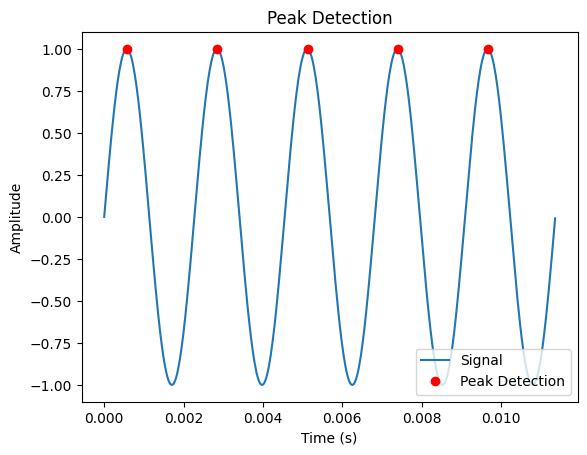

In [6]:
visualize_signal(signal, fs, pr_arr=pr_arr)

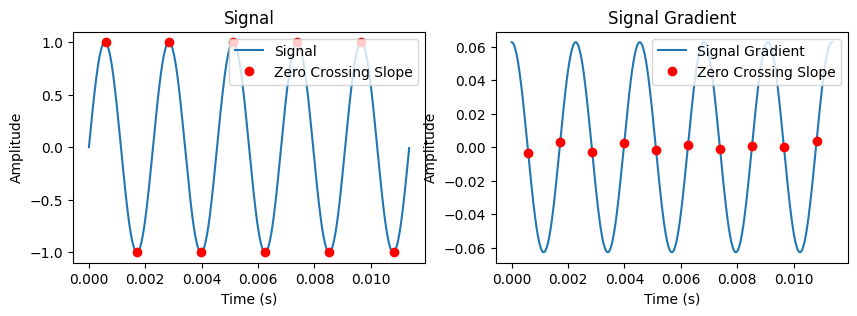

In [7]:
visualize_signal(signal, fs, zrc_slope_arr=zrc_slope_arr)

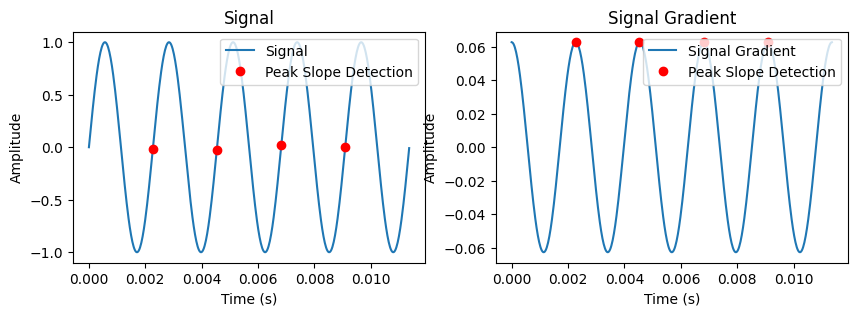

In [8]:
visualize_signal(signal, fs, pr_slope_arr=pr_slope_arr)

### On multi-harmonic signal

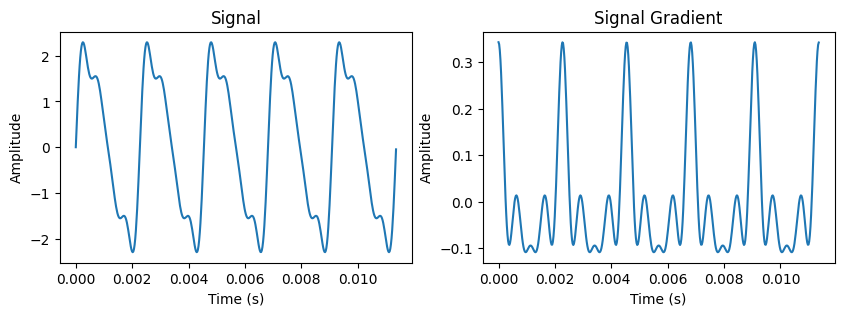

In [9]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 0.5
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

In [10]:
zrc, zrc_arr = zero_crossing_rate(s)
pr, pr_arr = peak_rate(s)
zrc_slope, zrc_slope_arr = slope_event_rate(s, mode="zcr")
pr_slope, pr_slope_arr = slope_event_rate(s, mode="pr")

print("Zero Crossing Rate Estimator: ", zrc_to_hz(zrc, fs, len(s)), "Hz")
print("Peak Rate Estimator: ", pr_to_hz(pr, fs, len(s)), "Hz")

Zero Crossing Rate Estimator:  439.2430278884462 Hz
Peak Rate Estimator:  1317.7290836653387 Hz


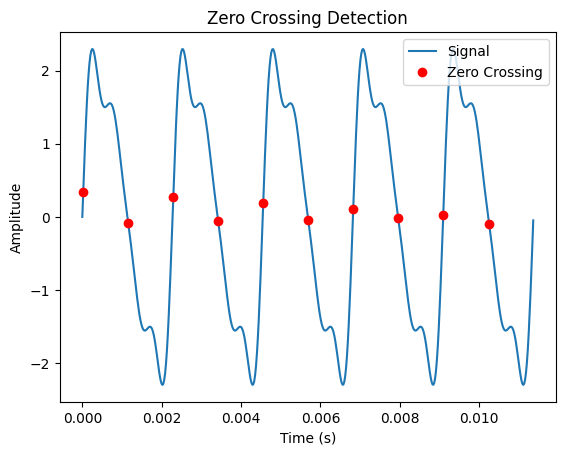

In [11]:
visualize_signal(s, fs, zrc_arr=zrc_arr)

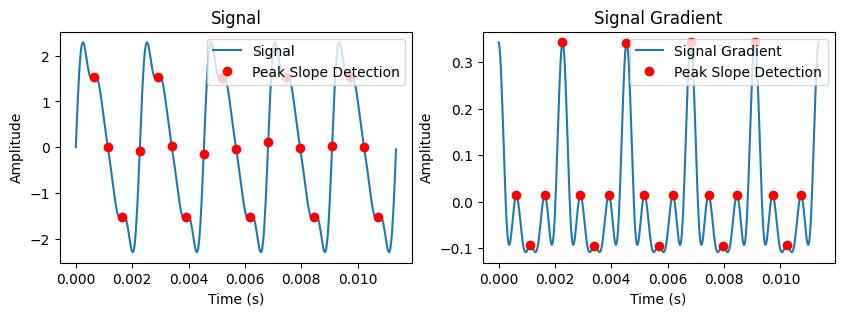

In [12]:
visualize_signal(s, fs, pr_slope_arr=pr_slope_arr)

## Auto-correlation based method

The auto-correlation should improve the robustness by a LOT

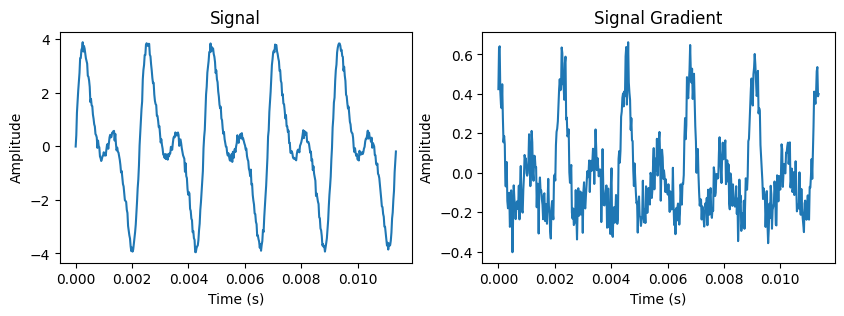

In [32]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 2
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = noise_signal(A*s0 + A1*s1 + A2*s2 + A3*s3 + K)

visualize_signal(s, fs)

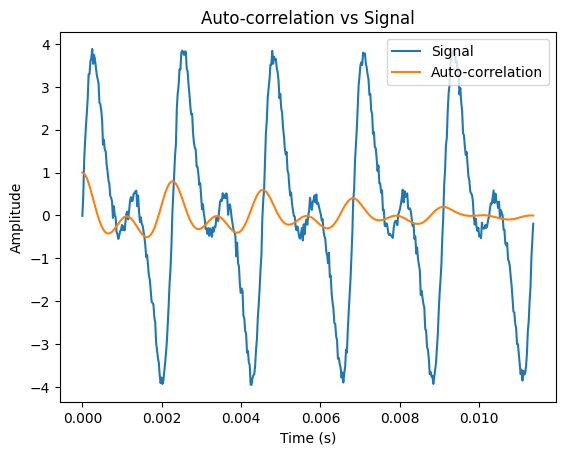

In [33]:
ac_s = auto_correlation(s)

visualize_signal(s, fs, ac_s=ac_s)

In [15]:
print('Pitch detected by peak rate of auto-correlation: ', ac_s_to_hz(ac_s,fs), 'Hz')

Pitch detected by peak rate of auto-correlation:  441.0 Hz


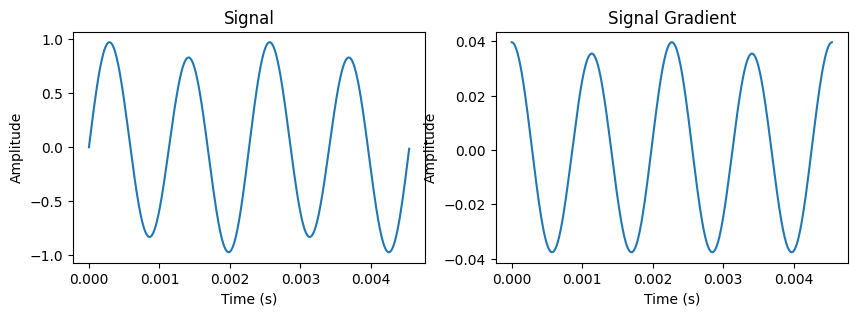

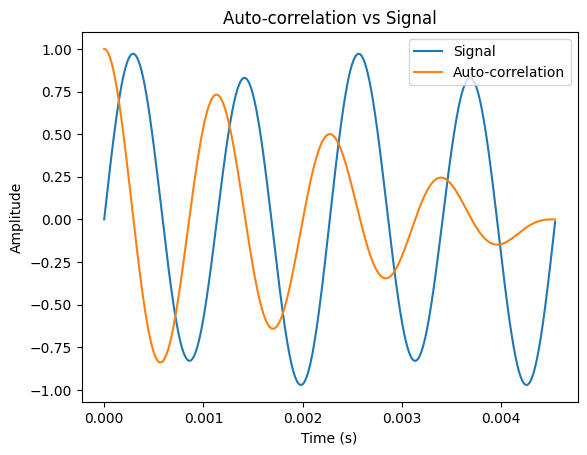

In [29]:
fs = 44100*3
f0 = 440
f1 = f0*2
A = 0.1
A1 = 0.9
nb_of_periods = 2

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1

visualize_signal(s, fs)
ac_s = auto_correlation(s)
visualize_signal(s, fs, ac_s=ac_s)

In [30]:
print('Pitch detected by peak rate of auto-correlation: ', ac_s_to_hz(ac_s,fs), 'Hz')

Pitch detected by peak rate of auto-correlation:  882.0 Hz


We see below, that even when we add a lot of noise, it still finds the good $f_0$

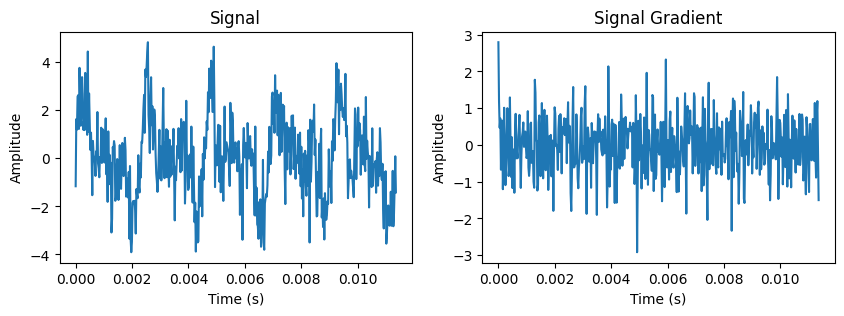

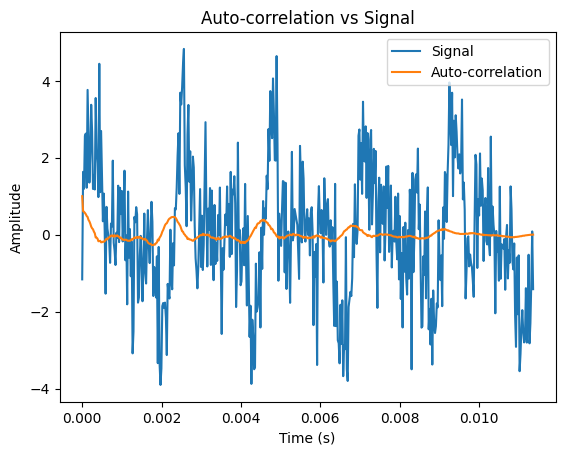

Pitch detected by peak rate of auto-correlation:  432.3529411764706 Hz


In [31]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 10
A2 = 2
A3 = 10
A4 = 0.125
nb_of_periods = 5

K = 0

s = generate_pseudoperiodic(f0, fs, number_of_periods=nb_of_periods)

visualize_signal(s, fs)
ac_s = auto_correlation(s)
visualize_signal(s, fs, ac_s=ac_s)

print('Pitch detected by peak rate of auto-correlation: ', ac_s_to_hz(ac_s,fs), 'Hz')

However, when we shift the harmonics a bit, to create some pseudo-periodic signals, we see that the autocorrelation fails.

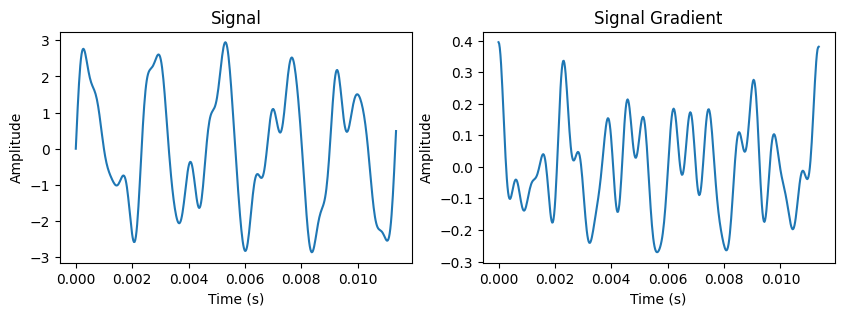

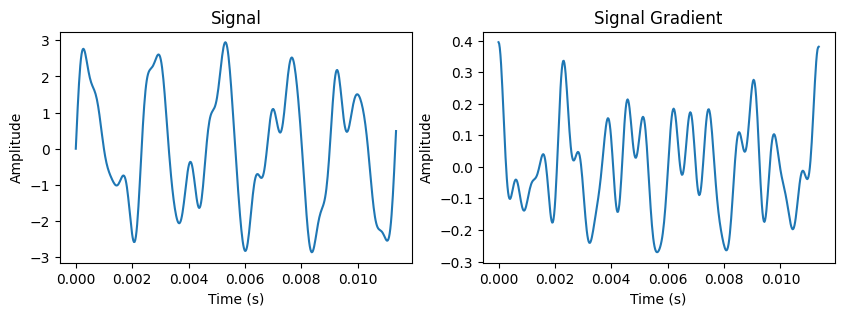

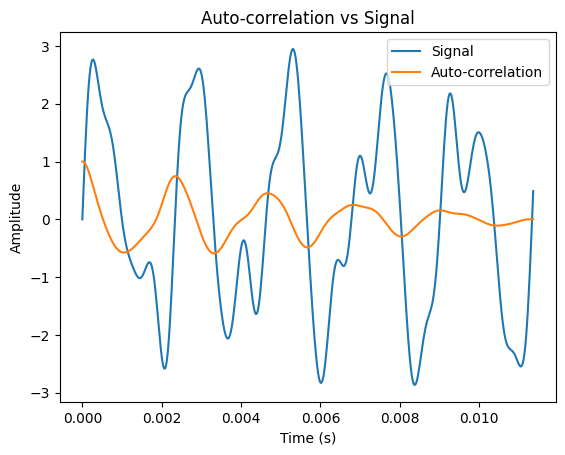

Pitch detected by peak rate of auto-correlation:  428.15533980582524 Hz


In [34]:
fs = 44100
f0 = 440
f1 = 800
f2 = 1320
f3 = 1760
A = 2
A1 = 1
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

visualize_signal(s, fs)
ac_s = auto_correlation(s)
visualize_signal(s, fs, ac_s=ac_s)

print('Pitch detected by peak rate of auto-correlation: ', ac_s_to_hz(ac_s,fs), 'Hz')

## YIN method

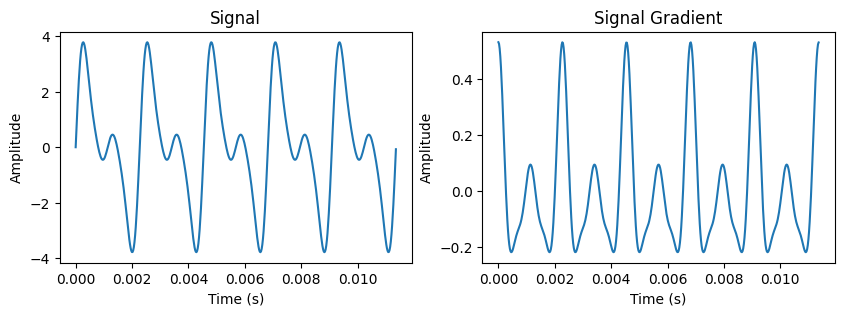

In [20]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 2
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

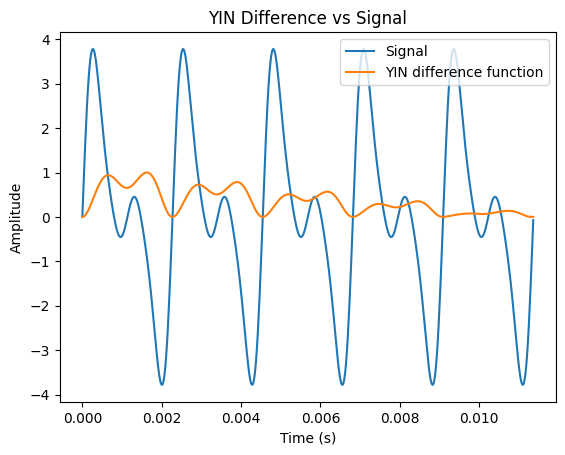

Pitch detected by peak rate of auto-correlation:  441.0 Hz


In [21]:
diff_arr = yin_difference(s)
visualize_signal(s,fs,yin_diff=diff_arr)
print('Pitch detected by peak rate of auto-correlation: ', yin_difference_to_hz(diff_arr,fs), 'Hz')

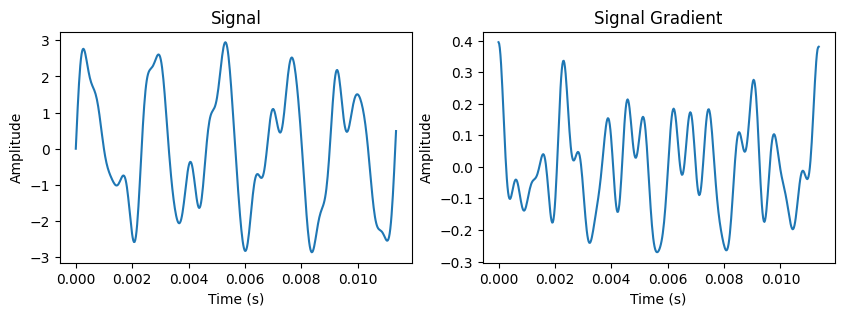

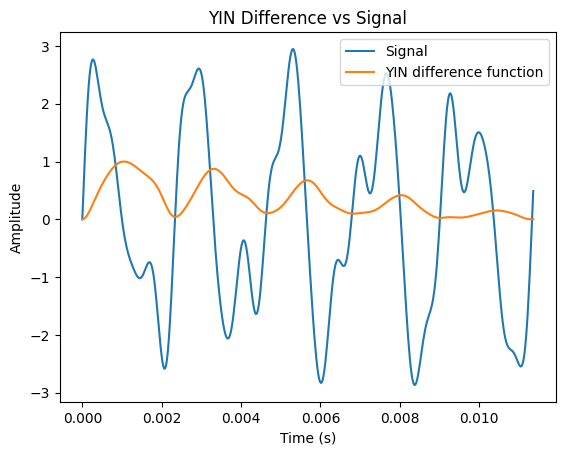

Pitch detected by peak rate of auto-correlation:  428.15533980582524 Hz


In [22]:
fs = 44100
f0 = 440
f1 = 800
f2 = 1320
f3 = 1760
A = 2
A1 = 1
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

diff_arr = yin_difference(s)
visualize_signal(s,fs,yin_diff=diff_arr)
print('Pitch detected by peak rate of auto-correlation: ', yin_difference_to_hz(diff_arr,fs,tol=1e-1), 'Hz')

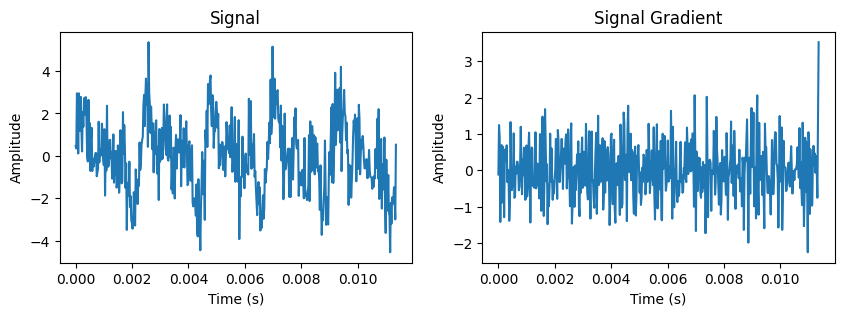

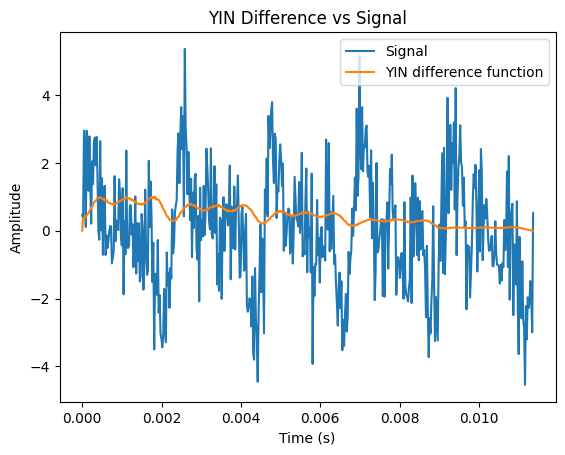

Pitch detected by peak rate of auto-correlation:  22050.0 Hz


In [23]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 10
A2 = 2
A3 = 10
A4 = 0.125
nb_of_periods = 5

K = 0

s = generate_pseudoperiodic(f0, fs, number_of_periods=nb_of_periods)

visualize_signal(s, fs)

diff_arr = yin_difference(s)
visualize_signal(s,fs,yin_diff=diff_arr)
print('Pitch detected by peak rate of auto-correlation: ', yin_difference_to_hz(diff_arr,fs,tol=2), 'Hz')

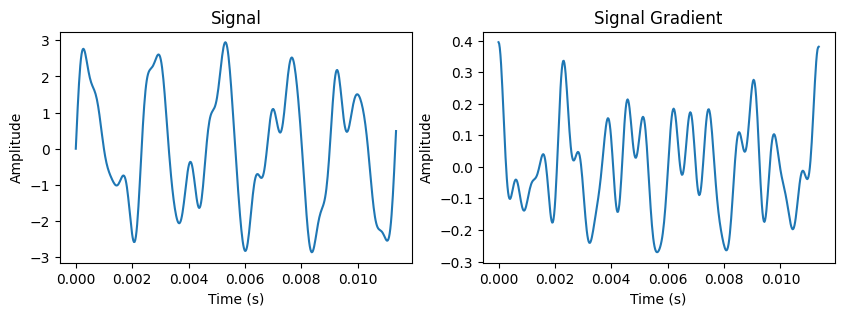

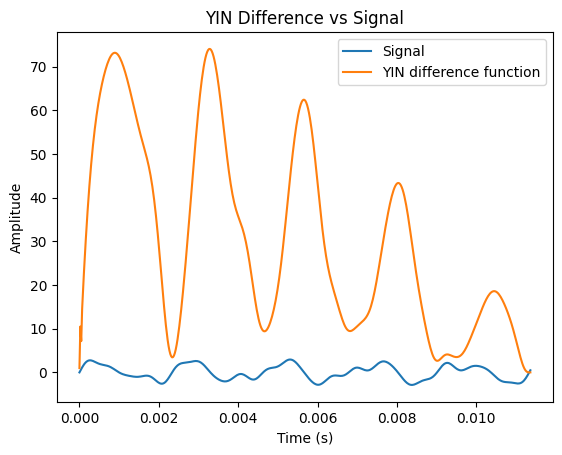

Pitch detected by peak rate of auto-correlation:  428.15533980582524 Hz


In [24]:
fs = 44100
f0 = 440
f1 = 800
f2 = 1320
f3 = 1760
A = 2
A1 = 1
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K

visualize_signal(s, fs)

diff_arr = yin_difference_cumsum(s)
visualize_signal(s,fs,yin_diff=diff_arr)
print('Pitch detected by peak rate of auto-correlation: ', yin_difference_cumsum_to_hz(diff_arr,fs), 'Hz')

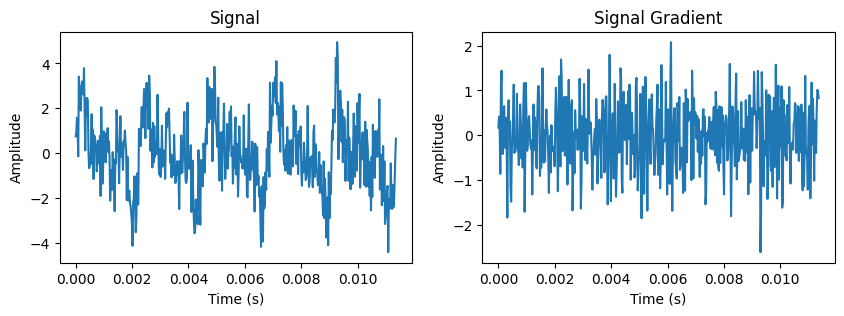

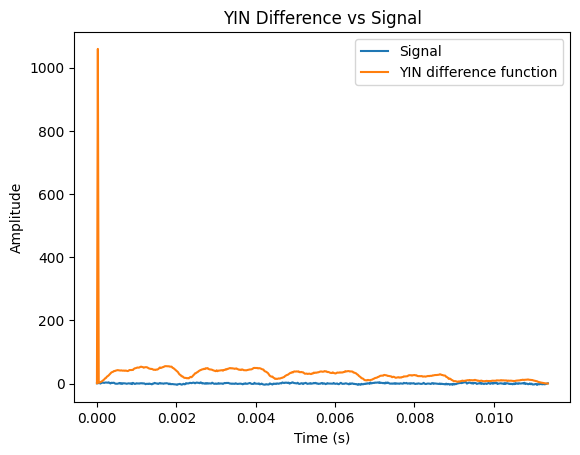

In [25]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 10
A2 = 2
A3 = 10
A4 = 0.125
nb_of_periods = 5

K = 0

s = generate_pseudoperiodic(f0, fs, number_of_periods=nb_of_periods)

visualize_signal(s, fs)

diff_arr = yin_difference_cumsum(s)
visualize_signal(s,fs,yin_diff=diff_arr)

## Approche par Cepstre

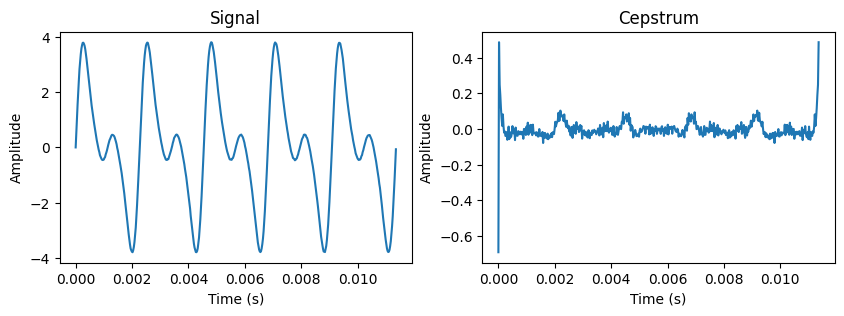

In [37]:
fs = 44100
f0 = 440
f1 = 880
f2 = 1320
f3 = 1760
A = 2
A1 = 2
A2 = 0.5
A3 = 0.25
A4 = 0.125
nb_of_periods = 5

K = 0

s0 = generate_signal(fs=fs, f0=f0, number_of_periods=nb_of_periods)
s1 = generate_signal(fs=fs, f0=f1, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s2 = generate_signal(fs=fs, f0=f2, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s3 = generate_signal(fs=fs, f0=f3, number_of_periods=nb_of_periods, duration=nb_of_periods/f0)
s = A*s0 + A1*s1 + A2*s2 + A3*s3 + K
s = noise_signal(s,sigma=0.01)

s_cepstre = compute_cepstrum(s, fs)
visualize_signal(s,fs,cepstrum=s_cepstre)